# Sensitivity analysis for Bayesian networks using credal networks

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.sideBySide(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

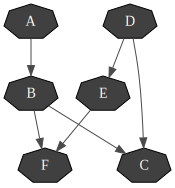


A:Range([0,1])
<> : [[0.194495 , 0.805505] , [0.169568 , 0.830432]]

B:Range([0,1])
<A:0> : [[0.325107 , 0.674893] , [0.323548 , 0.676452]]
<A:1> : [[0.791245 , 0.208755] , [0.791243 , 0.208757]]

C:Range([0,1])
<B:0|D:0> : [[0.643609 , 0.356391] , [0.643599 , 0.356401]]
<B:1|D:0> : [[0.444088 , 0.555912] , [0.443876 , 0.556124]]
<B:0|D:1> : [[0.402957 , 0.597043] , [0.402544 , 0.597456]]
<B:1|D:1> : [[0.690131 , 0.309869] , [0.690125 , 0.309875]]

D:Range([0,1])
<> : [[0.33723 , 0.66277] , [0.33597 , 0.66403]]

E:Range([0,1])
<D:0> : [[0.513181 , 0.486819] , [0.513109 , 0.486891]]
<D:1> : [[0.190695 , 0.809305] , [0.162044 , 0.837956]]

F:Range([0,1])
<E:0|B:0> : [[0.824999 , 0.175]]
<E:1|B:0> : [[0.416414 , 0.583586] , [0.0253418 , 0.974658]]
<E:0|B:1> : [[0.317441 , 0.682559] , [0.315653 , 0.684347]]
<E:1|B:1> : [[0.806995 , 0.193005] , [0.806994 , 0.193006]]




In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)

## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [4]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return f"<center><b>noise={beta}</b></center><br>{gnb.getInference(cr,engine=ielbp)}"

In [5]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add_html(showNoisy(bn,eps))
gnb.flow.display()